Import Libraris

In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras import optimizers




In [ ]:
data = pd.read_csv("reliance_data.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,01-01-1996,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,02-01-1996,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,03-01-1996,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,04-01-1996,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,05-01-1996,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN


In [ ]:
data.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
6200,23-11-2020,RELIANCE,EQ,1899.50,1951.00,1970.00,1926.25,1955.20,1950.70,1952.18,20918665,4.083700e+15,497781.0,5148955.0,0.2461
6201,24-11-2020,RELIANCE,EQ,1950.70,1964.00,1974.00,1932.00,1971.05,1964.05,1952.11,14277083,2.787040e+15,362587.0,3213843.0,0.2251
6202,25-11-2020,RELIANCE,EQ,1964.05,1980.00,1992.95,1942.20,1947.50,1947.80,1969.06,15062376,2.965870e+15,356793.0,3040444.0,0.2019
6203,26-11-2020,RELIANCE,EQ,1947.80,1953.05,1965.00,1930.05,1957.00,1952.60,1946.67,11924527,2.321310e+15,266412.0,3406506.0,0.2857
6204,27-11-2020,RELIANCE,EQ,1952.60,1940.50,1956.10,1921.40,1940.50,1929.80,1935.45,21845931,4.228160e+15,314085.0,12489338.0,0.5717


In [ ]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,6205.000000,6205.000000,6205.000000,6205.000000,5657.000000,6205.000000,6205.000000,6.205000e+03,6.205000e+03,2.356000e+03,4.693000e+03,4693.000000
mean,864.978445,866.381176,878.763811,852.795649,925.596986,865.291289,865.851146,6.215219e+06,5.187662e+14,1.383690e+05,2.239901e+06,0.436332
std,588.711275,590.165211,599.625939,578.473998,581.604138,588.763023,588.941488,5.479271e+06,7.539147e+14,1.260736e+05,1.861021e+06,0.145526
min,0.000000,102.600000,105.600000,99.600000,101.600000,101.300000,101.840000,5.282000e+04,3.480000e+12,2.991000e+03,2.909700e+04,0.076300
25%,335.200000,335.000000,340.700000,329.500000,437.550000,335.350000,335.710000,3.021751e+06,1.840000e+14,7.119900e+04,1.178486e+06,0.323000
50%,850.650000,852.500000,862.000000,842.100000,892.350000,850.700000,851.680000,4.602904e+06,3.270000e+14,9.841550e+04,1.784092e+06,0.452300
75%,1089.400000,1091.100000,1107.000000,1073.950000,1129.900000,1089.850000,1089.480000,7.304408e+06,5.730000e+14,1.559778e+05,2.685974e+06,0.546300
max,3220.850000,3298.000000,3298.000000,3141.300000,3223.000000,3220.850000,3197.750000,6.523089e+07,1.473430e+16,1.428490e+06,3.495888e+07,0.978300


In [ ]:
data['Date']=pd.to_datetime(data['Date']);

<ipython-input-5-27d8df80ce9e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date']=pd.to_datetime(data['Date']);


In [ ]:
data.head(20)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,RELIANCE,EQ,204.65,205.00,206.10,203.65,NaN,205.75,205.26,3717450,7.630000e+13,NaN,NaN,NaN
1,1996-02-01,RELIANCE,EQ,205.75,205.25,206.25,202.65,NaN,204.15,204.13,6024650,1.230000e+14,NaN,NaN,NaN
2,1996-03-01,RELIANCE,EQ,204.15,207.50,216.95,205.25,NaN,205.70,207.04,7473500,1.550000e+14,NaN,NaN,NaN
3,1996-04-01,RELIANCE,EQ,205.70,203.75,204.40,201.05,NaN,203.80,202.47,7744000,1.570000e+14,NaN,NaN,NaN
4,1996-05-01,RELIANCE,EQ,203.80,203.00,203.00,200.65,NaN,202.40,202.05,5952000,1.200000e+14,NaN,NaN,NaN
5,1996-08-01,RELIANCE,EQ,202.40,202.00,202.15,192.30,NaN,194.30,197.57,6675550,1.320000e+14,NaN,NaN,NaN
6,1996-09-01,RELIANCE,EQ,194.30,188.55,192.00,182.25,NaN,188.70,186.15,13880150,2.580000e+14,NaN,NaN,NaN
7,1996-10-01,RELIANCE,EQ,188.70,185.00,189.45,183.00,NaN,183.85,186.24,9875700,1.840000e+14,NaN,NaN,NaN
8,1996-11-01,RELIANCE,EQ,183.85,182.00,190.50,181.75,NaN,189.60,185.82,14625600,2.720000e+14,NaN,NaN,NaN
9,1996-12-01,RELIANCE,EQ,189.60,191.00,192.45,186.35,NaN,187.60,188.95,13377500,2.530000e+14,NaN,NaN,NaN


candle stick for given year

In [ ]:
df = data.loc[data["Date"].dt.year==2020,:];
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,230.000000,2.300000e+02,2.300000e+02,2.300000e+02,2.300000e+02,230.000000
mean,1719.122391,1724.650217,1750.653043,1695.951957,1722.063913,1720.930000,1723.406565,1.844649e+07,3.172958e+15,4.054413e+05,5.665088e+06,0.329247
std,375.712569,378.727660,376.589171,376.610897,375.639812,375.721744,377.008872,1.093071e+07,2.070710e+15,2.183448e+05,3.242581e+06,0.117424
min,884.050000,916.200000,950.000000,875.650000,891.000000,884.050000,899.320000,2.411900e+06,4.838160e+14,9.948400e+04,6.214850e+05,0.114800
25%,1445.100000,1453.762500,1472.712500,1430.112500,1446.500000,1445.100000,1452.515000,1.145554e+07,1.880250e+15,2.658772e+05,3.241737e+06,0.238400
50%,1636.800000,1656.500000,1702.375000,1633.800000,1685.200000,1680.000000,1677.250000,1.568513e+07,2.720000e+15,3.490370e+05,5.036454e+06,0.307200
75%,2086.575000,2090.800000,2121.750000,2061.887500,2092.000000,2086.575000,2091.435000,2.275622e+07,3.714092e+15,5.020468e+05,7.181379e+06,0.407800
max,2324.550000,2325.000000,2369.350000,2310.550000,2324.900000,2324.550000,2339.460000,6.523089e+07,1.473430e+16,1.428490e+06,1.919505e+07,0.656700


In [ ]:
candlestick = go.Candlestick( x=df.index,open=df['Open'],high=df['High'],low=df['Low'],close=df['Close'])

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width=1100, height=600,
    title="Reliance, 2020",
    yaxis_title='Price')

fig.show()

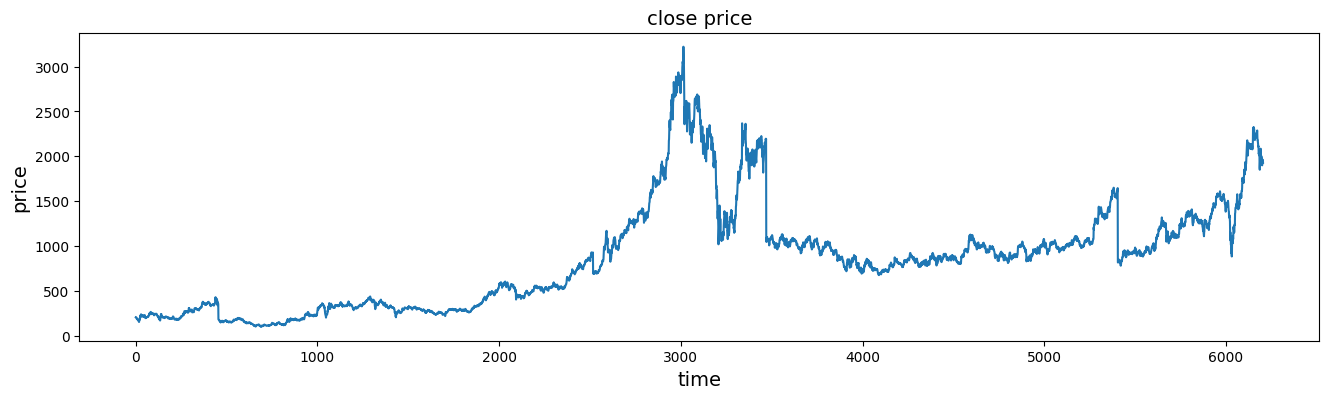

In [ ]:
plt.figure(figsize=(16,4));
plt.title('close price',fontsize=14);
plt.plot(data.Close);
plt.xlabel('time',fontsize=14);
plt.ylabel('price',fontsize=14);

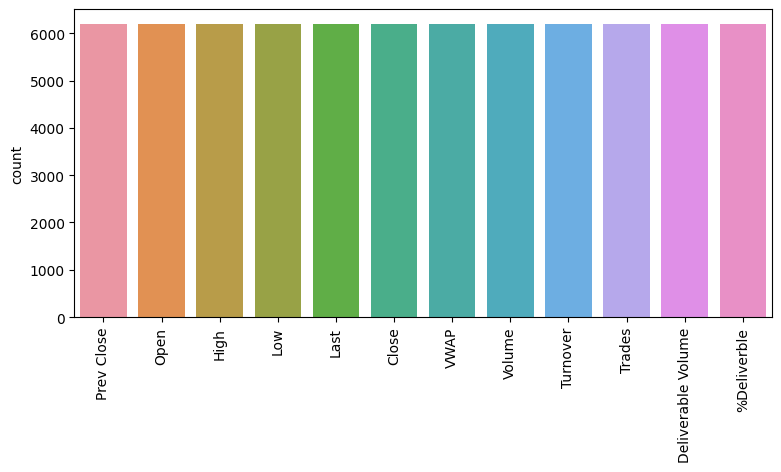

In [ ]:
fig1, ax = plt.subplots(1,1,figsize=(9,4),dpi=100)
sns.countplot(data=data,ax=ax)
ax.tick_params(axis='x', rotation=90)

In [ ]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
data = data.drop(columns=['Symbol', 'Series', 'Last', 'Trades', 'Deliverable Volume','%Deliverble'], axis=1);

In [ ]:
data = data[['Date','Prev Close','Open', 'High', 'Low', 'VWAP','Volume', 'Turnover','Close']];

In [ ]:
data.head()

,Date,Prev Close,Open,High,Low,VWAP,Volume,Turnover,Close
0,1996-01-01,204.65,205.00,206.10,203.65,205.26,3717450,7.630000e+13,205.75
1,1996-02-01,205.75,205.25,206.25,202.65,204.13,6024650,1.230000e+14,204.15
2,1996-03-01,204.15,207.50,216.95,205.25,207.04,7473500,1.550000e+14,205.70
3,1996-04-01,205.70,203.75,204.40,201.05,202.47,7744000,1.570000e+14,203.80
4,1996-05-01,203.80,203.00,203.00,200.65,202.05,5952000,1.200000e+14,202.40


In [ ]:
data.loc[5975,:]

Date          2020-01-01 00:00:00
Prev Close                1514.05
Open                       1518.0
High                       1527.1
Low                        1505.5
VWAP                      1515.23
Volume                    6402372
Turnover        970000000000000.0
Close                      1509.6
Name: 5975, dtype: object

In [ ]:
data.loc[5974,:]

Date          2019-12-31 00:00:00
Prev Close                 1544.2
Open                       1542.0
High                       1543.7
Low                       1508.05
VWAP                      1525.14
Volume                   10150467
Turnover       1550000000000000.0
Close                     1514.05
Name: 5974, dtype: object

In [ ]:
data = data.drop(columns=['Date'], axis=1);

In [ ]:
data.info

<bound method DataFrame.info of       Prev Close     Open     High      Low     VWAP    Volume      Turnover  \
0         204.65   205.00   206.10   203.65   205.26   3717450  7.630000e+13   
1         205.75   205.25   206.25   202.65   204.13   6024650  1.230000e+14   
2         204.15   207.50   216.95   205.25   207.04   7473500  1.550000e+14   
3         205.70   203.75   204.40   201.05   202.47   7744000  1.570000e+14   
4         203.80   203.00   203.00   200.65   202.05   5952000  1.200000e+14   
...          ...      ...      ...      ...      ...       ...           ...   
6200     1899.50  1951.00  1970.00  1926.25  1952.18  20918665  4.083700e+15   
6201     1950.70  1964.00  1974.00  1932.00  1952.11  14277083  2.787040e+15   
6202     1964.05  1980.00  1992.95  1942.20  1969.06  15062376  2.965870e+15   
6203     1947.80  1953.05  1965.00  1930.05  1946.67  11924527  2.321310e+15   
6204     1952.60  1940.50  1956.10  1921.40  1935.45  21845931  4.228160e+15   

       

2. Time Series Forecasting

In [ ]:
# Scale the dataset
scaler = MinMaxScaler(feature_range=(0,1));
dataset = data.values.astype('float32')

In [ ]:
dataset.shape

(6205, 8)

In [ ]:
#  Perform separate scaling for training and testing data set to avoid DATA LEAKAGE

scaled1 = scaler.fit_transform(dataset[0:5974,:]); # Years until 2019
scaled2 = scaler.fit_transform(dataset[5974:6205,:]); # Year 2020


In [ ]:
scaled1.shape

(5974, 8)

In [ ]:
scaled2.shape

(231, 8)

In [ ]:
scaled  = np.concatenate((scaled1, scaled2), axis=0);


In [ ]:
scaled.shape

(6205, 8)

In [ ]:
X_train = scaled[0:5974,0:-1]; # Years until 2019
X_train.shape

(5974, 7)

In [ ]:
X_test = scaled[5974:-1,0:-1]; # Year 2020
X_test.shape

(230, 7)

In [ ]:
Y_train = scaled[0:5974,-1];  # Years until 2019
Y_true  = scaled[5974:-1,-1]; # Year 2020

In [ ]:
Y_train.shape,Y_true.shape

((5974,), (230,))

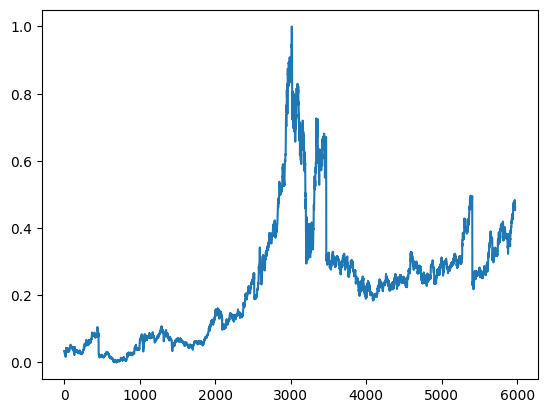

In [ ]:
plt.plot(Y_train) # scaled version of price action till 2019

In [ ]:
# Reshape the data
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1));
X_train.shape

(5974, 7, 1)

In [ ]:
X_test = np.array(X_test);
# Reshape the data
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1));
X_test.shape

(230, 7, 1)

In [ ]:

# build the LSTM Model
LSTM_model = Sequential();
LSTM_model.add(LSTM(units=50, return_sequences=True, input_shape=(7, 1)))
LSTM_model.add(LSTM(units=50, return_sequences=False))
LSTM_model.add(Dense(25, activation='sigmoid'))
LSTM_model.add(Dropout(0.2))
LSTM_model.add(Dense(1, activation='sigmoid'))


In [ ]:
LSTM_model.compile(loss = 'mean_squared_error',optimizer = 'adam');


Epoch 1/5
598/598 [==============================] - 11s 12ms/step - loss: 0.0111 - val_loss: 0.0024
Epoch 2/5
598/598 [==============================] - 6s 10ms/step - loss: 0.0011 - val_loss: 0.0014
Epoch 3/5
598/598 [==============================] - 7s 11ms/step - loss: 7.8444e-04 - val_loss: 0.0015
Epoch 4/5
598/598 [==============================] - 6s 10ms/step - loss: 8.1549e-04 - val_loss: 0.0020
Epoch 5/5
598/598 [==============================] - 6s 10ms/step - loss: 7.1314e-04 - val_loss: 0.0012


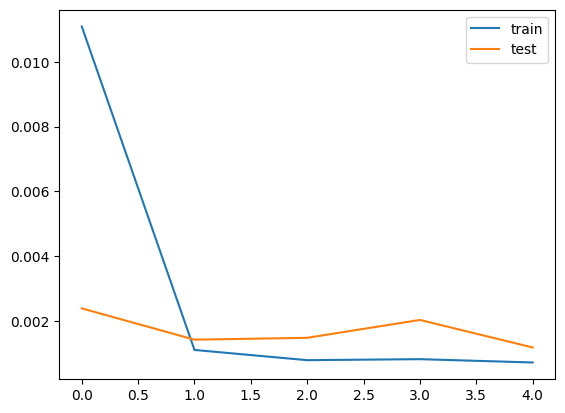

In [ ]:
history = LSTM_model.fit(X_train,Y_train,batch_size = 10,epochs = 5,validation_data=(X_test, Y_true));
plt.plot(history.history['loss'],label='train');
plt.plot(history.history['val_loss'],label='test');
plt.legend();

In [ ]:
y_pred   = LSTM_model.predict(X_test);


8/8 [==============================] - 1s 4ms/step


In [ ]:
X_test   = X_test.reshape(X_test.shape[0],X_test.shape[1]);
datafwd  = np.concatenate((X_test, y_pred), axis=1);
inv_data = scaler.inverse_transform(datafwd);
ypred    = inv_data[:,-1];

3. Results

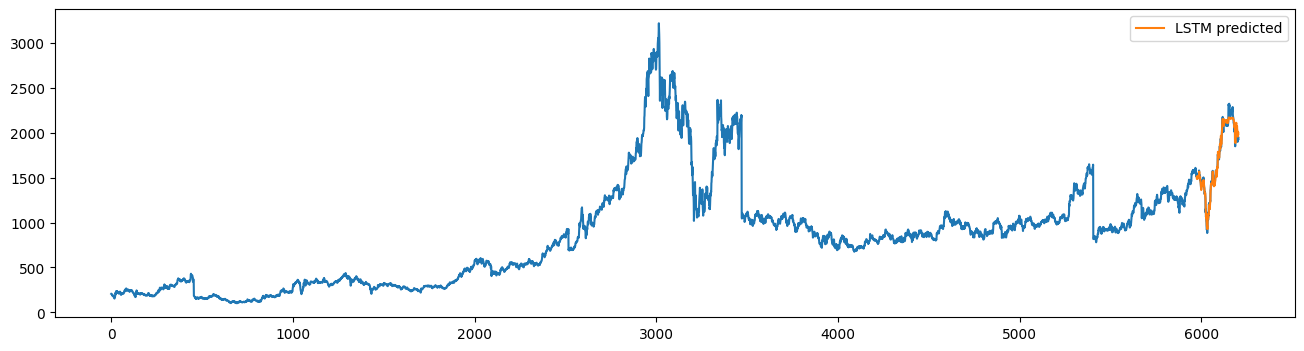

In [ ]:
plt.figure(figsize=(16,4));
plt.plot(data.Close);
index_2020 = list(range(5974,6204));
plt.plot(index_2020,ypred,label='LSTM predicted');
plt.legend();

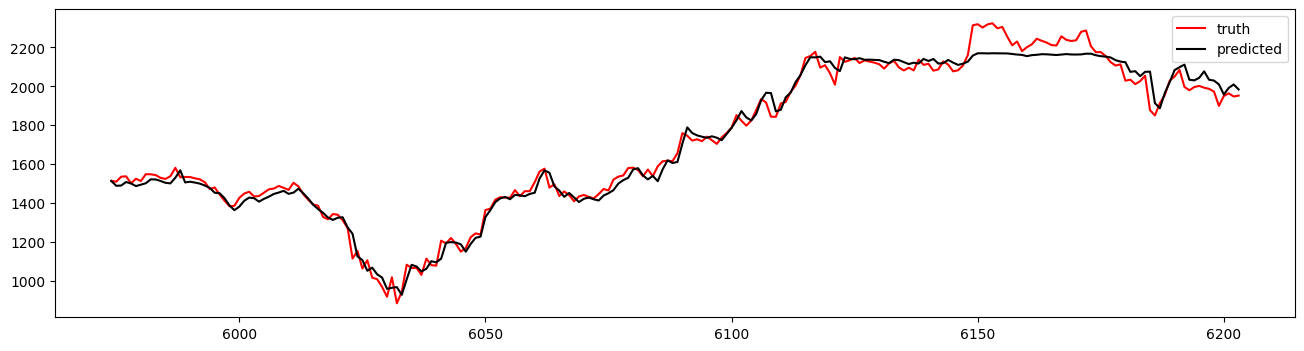

In [ ]:
plt.figure(figsize=(16,4));
plt.plot(data.Close[5974:6204],'r',label='truth');
index_2020 = list(range(5974,6204));
plt.plot(index_2020,ypred,'k',label='predicted');
plt.legend()